In [2]:
import tensorflow.keras as keras
import os
import cv2
from PIL import Image, ImageFile,ImageStat
from sklearn import svm
from tensorflow.keras.preprocessing import image
import numpy as np
import math
import matplotlib.pyplot as plt

In [25]:
def getImageVar(imgPath):
    image = cv2.imread(imgPath);
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageVar = cv2.Laplacian(img2gray, cv2.CV_64F).var()
    return imageVar
def brightness( im_file ):
    ''''
    i=cv2.imread(im_file)
    color=np.zeros((1,3))
    for j in np.arange(3):
        color[j]=np.mean(i[:,:,j])
    a=color.max()/color.min()
    '''
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0],stat.rms[0]#,a,color[0],color[1],color[2]

In [27]:
filenames=[]
features=[]
labels=[]
cnt=0

def getFile(folder,y):
    global filenames
    global features
    global cnt
    path='E:/LectureFile/datamining/traindata/'+folder+'/'
    dir = path
    for root, dir, files in os.walk(dir):
        for file in files:
            fname=str(file)
            if fname[-4:]!='.gif':
                imagepath=path+fname
                img=Image.open(imagepath)
                #var=getImageVar(imagepath)
                mean,rms=brightness(imagepath)
                features.append([img.size[0],img.size[1],0,mean,rms,y])
                cnt+=1
                if cnt%1000==0:
                    print(cnt)      

In [28]:
getFile('rumor_pic',0)
getFile('true_pic_1',1)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


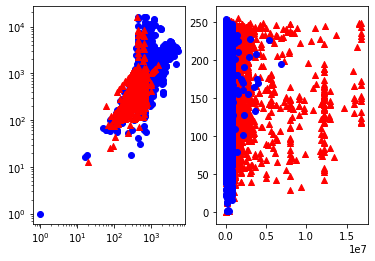

<Figure size 720x720 with 0 Axes>

In [38]:
Tsize=Feature[Feature[:,5]==1,0]*(Feature[Feature[:,5]==1,1])
Fsize=Feature[Feature[:,5]==0,0]*(Feature[Feature[:,5]==0,1])
Feature=np.array(features)
fig,ax=plt.subplots(1,2)
plt.figure(figsize=(10,10)) 
ax[0].scatter(Feature[Feature[:,5]==1,0],Feature[Feature[:,5]==1,1],marker='o',c='b')
ax[0].scatter(Feature[Feature[:,5]==0,0],Feature[Feature[:,5]==0,1],marker='^',c='r')
#ax[1].violinplot([Feature[Feature[:,5]==0,3],Feature[Feature[:,5]==1,3],Feature[Feature[:,5]==0,4],Feature[Feature[:,5]==1,4]])
ax[1].scatter(Tsize,Feature[Feature[:,5]==1,4],marker='^',c='r')
ax[1].scatter(Fsize,Feature[Feature[:,5]==0,4],marker='o',c='b')

ax[0].set_xscale('log')
ax[0].set_yscale('log')

plt.show()

array([[360.        , 639.        ,   0.        , 105.63086854,
        142.3558309 ,   0.        ],
       [180.        , 180.        ,   0.        , 165.01154321,
        181.73045856,   0.        ],
       [650.        , 460.        ,   0.        ,  76.19006355,
         99.10103025,   0.        ],
       [440.        , 765.        ,   0.        , 216.35596554,
        222.42810555,   0.        ],
       [360.        , 640.        ,   0.        , 114.54775174,
        120.37629449,   0.        ],
       [360.        , 270.        ,   0.        , 159.97049383,
        165.599595  ,   0.        ],
       [690.        , 518.        ,   0.        , 170.52151251,
        176.62150561,   0.        ],
       [406.        , 270.        ,   0.        , 120.14954388,
        133.2622041 ,   0.        ],
       [480.        , 640.        ,   0.        , 136.20535482,
        150.4467122 ,   0.        ],
       [690.        , 469.        ,   0.        ,  71.18446587,
         85.22752276,   0. 

In [56]:
import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Extra kwargs are passed through to `fill_between`

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : scalar or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in 'hv':
        raise ValueError("orientation must be in {{'h', 'v'}} "
                         "not {o}".format(o=orientation))

    kwargs.setdefault('step', 'post')
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError('Must provide one more bin edge than value not: '
                         'len(edges): {lb} len(values): {lv}'.format(
                             lb=len(edges), lv=len(values)))

    if bottoms is None:
        bottoms = np.zeros_like(values)
    if np.isscalar(bottoms):
        bottoms = np.ones_like(values) * bottoms

    values = np.r_[values, values[-1]]
    bottoms = np.r_[bottoms, bottoms[-1]]
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (N, M) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, optional
        The initial positions of the bottoms, defaults to 0

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If stacked_data is a mapping, and labels is None, default to the keys
        (which may come out in a random order).

        If stacked_data is a mapping and labels is given then only
        the columns listed by be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra kwargs to pass through to the plotting function.  This
        will be the same for all calls to the plotting function and will
        over-ride the values in cycle.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = 'dflt set {n}'.format(n=j)
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=['set {n}'.format(n=n) for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = OrderedDict(zip((c['label'] for c in label_cycle), stack_data))

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v


Text(0.5, 0, 'x')

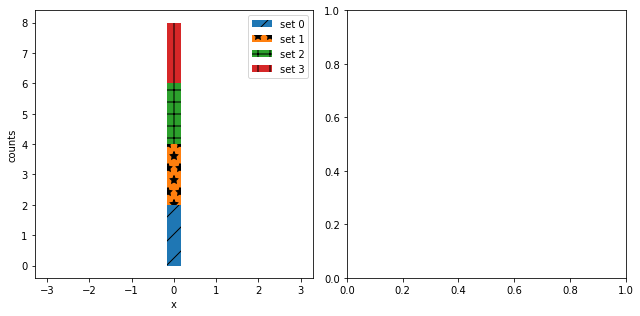

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, Feature, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)
''''arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))'''
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
#ax2.set_xlabel('counts')
#ax2.set_ylabel('x')